In [88]:
#importing dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [89]:
#loading the dataset
df=pd.read_csv(r"C:\Users\noman\projects\codsoft intership\SpamSMSdetection\spam.csv", encoding="ISO-8859-1")
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [90]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [92]:
#label encoding
df.loc[df['v1'] == 'spam','v1']=0
df.loc[df['v1'] == 'ham','v1']=1

In [93]:
df.head()

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [95]:
#converting dependent column to int from string
df['v1']=df['v1'].astype('int')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int32 
 1   v2      5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [97]:
x=df['v2']
y=df['v1']

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, shuffle=True)

In [100]:
#making an instance of the tf-idf vectorizer
vectorizer=TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [101]:
x_train_features=vectorizer.fit_transform(x_train)
x_test_features=vectorizer.transform(x_test)

In [87]:
#printing the feature matrix that we have got
print(x_train_features)

  (0, 3215)	0.4906168101233951
  (0, 2448)	0.42851704695516457
  (0, 3996)	0.3223568006288234
  (0, 3957)	0.5030622546639323
  (0, 2450)	0.4676352714605261
  (1, 4758)	0.3183852852738443
  (1, 1184)	0.5919681759249492
  (1, 6989)	0.31244358988493304
  (1, 1410)	0.6712551615838772
  (2, 6010)	0.28939086606892894
  (2, 5747)	0.25937974986915113
  (2, 6701)	0.17113043087057567
  (2, 5994)	0.29948465774551486
  (2, 4296)	0.20998011171659448
  (2, 2293)	0.29948465774551486
  (2, 6699)	0.25937974986915113
  (2, 5737)	0.6996012490463888
  (2, 3325)	0.19873579835520938
  (3, 6765)	0.516834177867194
  (3, 4907)	0.4687901929284765
  (3, 5023)	0.3679201326500963
  (3, 6738)	0.31069294897187494
  (3, 2908)	0.28987311800338217
  (3, 3215)	0.44406804716317555
  (4, 1724)	0.4462438758975762
  :	:
  (4451, 6603)	0.2771218552591541
  (4451, 2908)	0.1301111843527049
  (4452, 2261)	1.0
  (4453, 813)	0.4245699011695784
  (4453, 2442)	0.3837260430704534
  (4453, 2948)	0.3746426785710667
  (4453, 7166)	0.25

In [105]:
#making an instance of the classifier model
classifier=DecisionTreeClassifier(criterion='gini')

In [106]:
classifier.fit(x_train_features,y_train)

DecisionTreeClassifier()

[Text(0.8993869936034116, 0.9928571428571429, 'x[6809] <= 0.055\ngini = 0.235\nsamples = 4457\nvalue = [607, 3850]'),
 Text(0.8328891257995735, 0.9785714285714285, 'x[1759] <= 0.069\ngini = 0.201\nsamples = 4331\nvalue = [492, 3839]'),
 Text(0.8243603411513859, 0.9642857142857143, 'x[2881] <= 0.076\ngini = 0.177\nsamples = 4256\nvalue = [417, 3839]'),
 Text(0.7745202558635395, 0.95, 'x[7327] <= 0.069\ngini = 0.145\nsamples = 4115\nvalue = [325, 3790]'),
 Text(0.7659914712153518, 0.9357142857142857, 'x[5801] <= 0.076\ngini = 0.128\nsamples = 4070\nvalue = [280, 3790]'),
 Text(0.7281449893390192, 0.9214285714285714, 'x[6914] <= 0.161\ngini = 0.114\nsamples = 4031\nvalue = [244, 3787]'),
 Text(0.6950959488272921, 0.9071428571428571, 'x[311] <= 0.077\ngini = 0.102\nsamples = 3999\nvalue = [216, 3783]'),
 Text(0.6865671641791045, 0.8928571428571429, 'x[537] <= 0.074\ngini = 0.095\nsamples = 3981\nvalue = [198, 3783]'),
 Text(0.6631130063965884, 0.8785714285714286, 'x[6988] <= 0.095\ngini = 

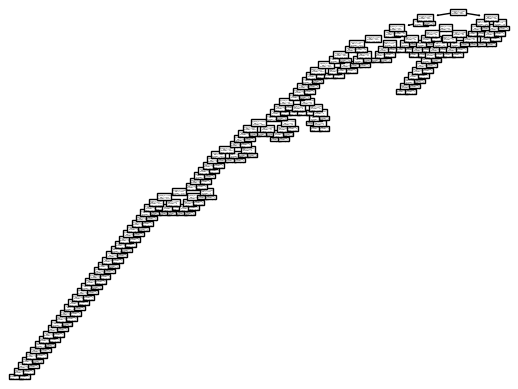

In [104]:
tree.plot_tree(classifier)

In [108]:
y_pred=classifier.predict(x_test_features)

In [110]:
print(f'the accuracy of the model is: {accuracy_score(y_test,y_pred)*100} %')

the accuracy of the model is: 96.7713004484305 %
